In [1]:
using DataFrames
using CSV
using CategoricalArrays
using JSON
using Serialization
using PlotlyJS

In [2]:
using Midas
using Midas.Distances

┌ Info: Precompiling Midas [2b44d41b-7b94-4859-a521-e4f6ea90704c]
└ @ Base loading.jl:1260


## File paths

In [5]:
taxonomy_file = "/Users/student/notebooks/midas/midas-notebooks-2019/build-v1-database/out/3-curated-taxonomy-assignments.csv"
signature_file_name = "/Users/student/projects/midas/data/2019_20/refseq_curated_1.1beta_200604.midas-signatures.gz"
;

In [6]:
tmpdir = "tmp/"
!isdir(tmpdir) && mkdir(tmpdir);

false

In [7]:
outdir = "../../data/processed/200716-detect-overlaps/"
isdir(outdir) || mkdir(outdir);

In [8]:
out_files = Dict(
    :species_diameters => joinpath(outdir, "200716-species-diameters.csv"),
    :genus_diameters => joinpath(outdir, "200716-genus-diameters.csv"),
);

## Load taxonomy

In [9]:
taxdf = DataFrame(CSV.File(taxonomy_file));

In [10]:
sig_genera = categorical(taxdf[!, :genus])
genera = levels(sig_genera)
ngenera = length(genera)

sig_species = categorical([(row[:genus], row[:species]) for row in eachrow(taxdf)])
species = levels(sig_species)
nspecies = length(species)

ngenera, nspecies

(419, 1438)

In [11]:
genus_counts = counts(sig_genera.refs)
species_counts = counts(sig_species.refs)
;

## Load diameters

In [22]:
genus_diameters_dict = deserialize(joinpath(tmpdir, "genus-diameters.jld"))
genus_diameters = [genus_diameters_dict[i][1] for i in 1:ngenera];

In [23]:
species_diameters_dict = deserialize(joinpath(tmpdir, "species-diameters.jld"))
species_diameters = [species_diameters_dict[i][1] for i in 1:nspecies];

SystemError: SystemError: opening file "tmp/species-diameters.jld": No such file or directory

## Plot

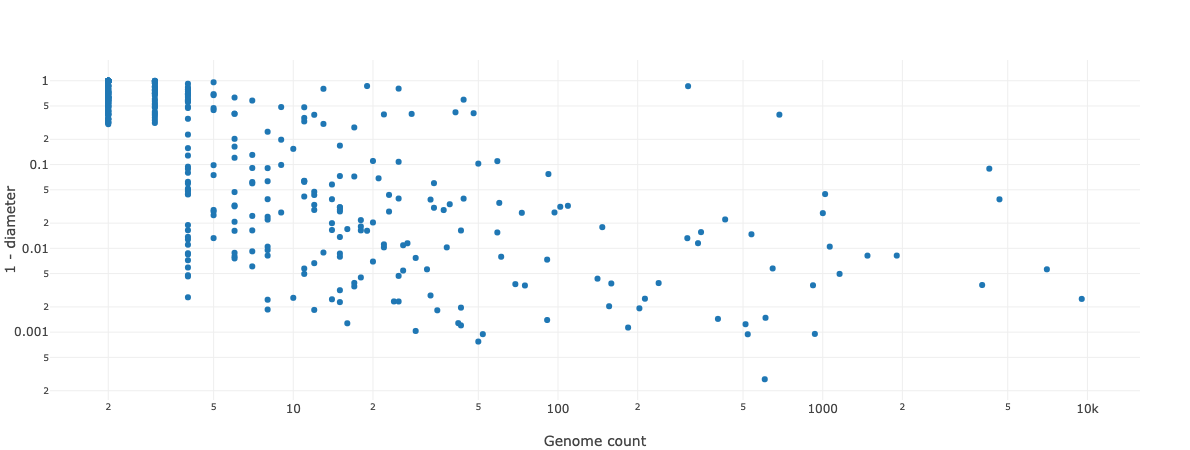

In [27]:
let
    trace1 = scatter(
        x=genus_counts,
        y=1 .- genus_diameters,
        mode="markers",
        text=genera,
    )
    layout = Layout(
        xaxis=attr(title="Genome count", type="log"),
        yaxis=attr(title="1 - diameter", type="log"),
    )
    plot([trace1], layout)
end